# K-MEANS CLUSTERING

### Using customer dataset from a mall


In [1]:
# Importing dependencies

from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading of data

data =  pd.read_csv('Mall_Customers.csv')

In [3]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data.shape

(200, 5)

In [5]:
data.isna().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [8]:
data.rename(columns = {'Annual Income (k$)' : 'Income', 'Spending Score (1-100)' : 'Score'}, inplace = True)

In [9]:
data.head()

,CustomerID,Genre,Age,Income,Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Bivariate Analysis

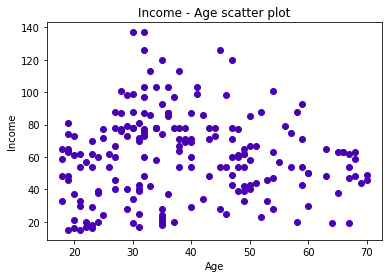

In [10]:
plt.scatter(data.Age, data.Income, color = '#4800B2')
plt.title("Income - Age scatter plot")
plt.xlabel("Age")
plt.ylabel("Income")
plt.show()

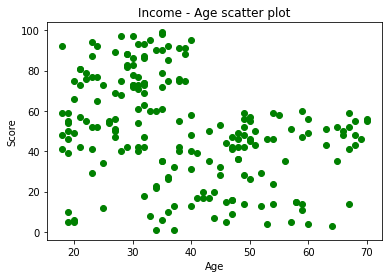

In [11]:
plt.scatter(data.Age, data.Score, color = 'g')
plt.title("Income - Age scatter plot")
plt.xlabel("Age")
plt.ylabel("Score")
plt.show()

### From the plots above, it is evident that theres no linear relationship between Age and Income/Score

In [12]:
# creating a variable off dataset

x = data.drop(columns = ['CustomerID', 'Genre', 'Age'])

In [13]:
x

,Income,Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


### Modelling Process

In [14]:
k_range = range(1,11)
sse  = []
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(x)
    sse.append(km.inertia_)
    

In [15]:
sse

[269981.28,
 181363.59595959593,
 106348.37306211122,
 73679.78903948836,
 44448.4554479337,
 37265.86520484346,
 30259.65720728547,
 24986.52564064288,
 21826.93630323166,
 19669.710998301212]

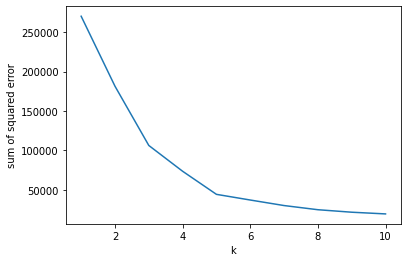

In [16]:
# plotting of elbow graph

plt.xlabel('k')
plt.ylabel('sum of squared error')
plt.plot(k_range, sse)

### from the plot above, the elbow point is best at k value of 5, so the adopted k value fro the modelling is 5

In [17]:
# Creating an object of the model

km = KMeans(n_clusters=5)
km

KMeans(n_clusters=5)

In [18]:
# model prediction

y_pred = km.fit_predict(x)
y_pred

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 1,
       2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 4, 0, 1, 0, 4, 0, 4, 0,
       1, 0, 4, 0, 4, 0, 4, 0, 4, 0, 1, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0])

In [19]:
#To create a column for the clusters

x['Cluster'] = y_pred
x

,Income,Score,Cluster
0,15,39,2
1,15,81,3
2,16,6,2
3,16,77,3
4,17,40,2
...,...,...,...
195,120,79,0
196,126,28,4
197,126,74,0
198,137,18,4


In [20]:
x['Cluster'].value_counts()

1    81
0    39
4    35
2    23
3    22
Name: Cluster, dtype: int64

In [21]:
#creating a dataframe for each clusters

x1 = x[x['Cluster']==0]
x2 = x[x['Cluster']==1]
x3 = x[x['Cluster']==2]
x4 = x[x['Cluster']==3]
x5 = x[x['Cluster']==4]


In [22]:
km.cluster_centers_

array([[86.53846154, 82.12820513],
       [55.2962963 , 49.51851852],
       [26.30434783, 20.91304348],
       [25.72727273, 79.36363636],
       [88.2       , 17.11428571]])

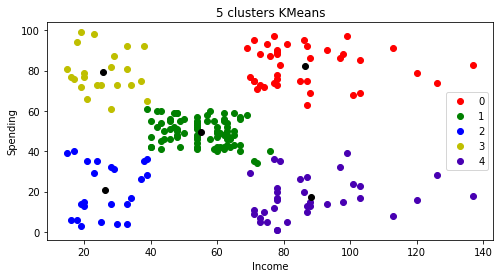

In [24]:
#creating a scatter plot


plt.figure(figsize = (8,4))
plt.scatter(x1.Income, x1.Score, color = 'r', label = 0)
plt.scatter(x2.Income, x2.Score, color = 'g', label = 1)
plt.scatter(x3.Income, x3.Score, color = 'b', label = 2)
plt.scatter(x4.Income, x4.Score, color = 'y', label = 3)
plt.scatter(x5.Income, x5.Score, color = '#4800B2', label = 4)
plt.xlabel('Income')
plt.ylabel('Spending')
plt.legend()
plt.title('5 clusters KMeans')
# adding the centroids to plot
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color = 'black', marker = 'o', label ='centroids')
plt.show()



### from the plot above, the deductions of analysis are:
### - label 0 are high income and high spending customers
### - label 1 are average income and average spending customers
### - label 2 are low income and low spending customers
### - label 3 are low income and high spending customers
### - label 4 are high income and low spending customers